# Problem Statement
    The goal is to classify whether the breast cancer is benign or malignant.To acheive this we need to use machine learning classification function that can predict discrete class of new inputs. In this project I will use 4 diffrent classification models i.e. Logistic Regression, KNN, SVM and Decision Tree Classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe(include = "all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [8]:
#Finding missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df = df.drop(["Unnamed: 32"],axis = 1)

In [10]:
diag_group = df.groupby("diagnosis")

In [11]:
print("Total number of rows diagnosed malignant: ", diag_group.get_group("M").shape[0])

Total number of rows diagnosed malignant:  212


In [12]:
print("Total number of rows diagnosed benign: ",diag_group.get_group("B").shape[0])

Total number of rows diagnosed benign:  357


# Feature Selection

In [13]:
df = df.drop(["id"],axis = 1)
#Encoding categorical data values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

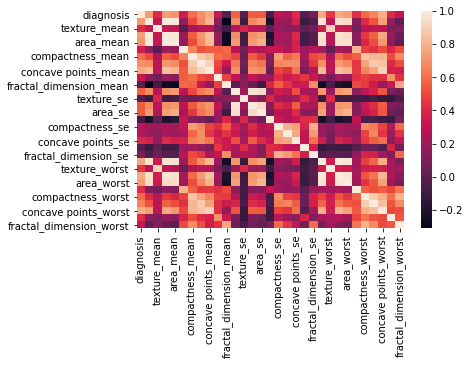

In [14]:
#Finding correlation between the features
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [15]:
#fill true value array with shape of corr.shape[0]
#print(np.full(corr.shape[0],True, dtype=bool))

In [16]:
#Compare correlation between the features and remove features that have correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [17]:
df.shape

(569, 21)

In [18]:
#Now we will calculate p-value for every predictor variable in regression model for given dataset and we can conclude from 
#p-value that if p-value is greater than 0.05 then that feature don't have any significant contribution to predict 
#cancer type . Hence the feature will be removed.

X = df.iloc[:,1:]
Y = df.iloc[:,0]
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values = pd.DataFrame({'feature': p_values.index, 'PVal': p_values.values})

In [19]:
p_values

,feature,PVal
0,radius_mean,1.892927e-03
1,texture_mean,3.287920e-04
2,smoothness_mean,7.410153e-01
3,compactness_mean,8.469196e-01
4,concavity_mean,1.445864e-03
5,symmetry_mean,6.385348e-02
6,fractal_dimension_mean,6.683047e-11
7,radius_se,2.027126e-04
8,texture_se,2.911401e-01
9,smoothness_se,2.304034e-01


In [20]:
threshold = 0.05
for i in range(len(p_values)):
    if p_values.iloc[i].PVal > threshold:
        df = df.drop(p_values.iloc[i].feature, axis = 1)

In [21]:
df.shape

(569, 11)

In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'concavity_se',
       'concave points_se', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

# Outliers  Identification

<AxesSubplot:xlabel='concavity_mean'>

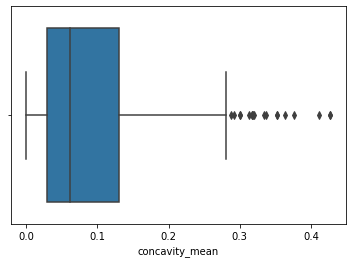

In [23]:
import seaborn as sns
#radius_mean
sns.boxplot(x = df['concavity_mean'])

In [24]:
outlier = df[df['concavity_mean'] > 0.25]

In [25]:
df = df[df['concavity_mean'] < 0.25]

<AxesSubplot:xlabel='concavity_mean'>

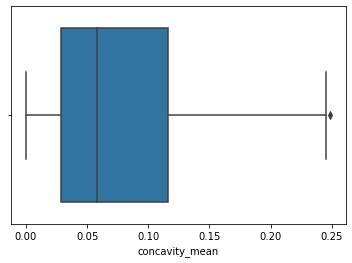

In [26]:
sns.boxplot(x = df['concavity_mean'])

In [27]:
df.shape

(544, 11)

<AxesSubplot:xlabel='radius_mean'>

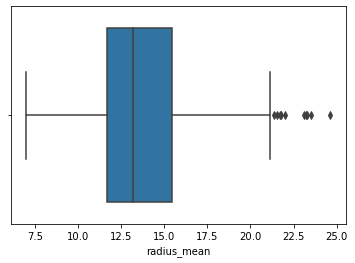

In [28]:
sns.boxplot(x = df['radius_mean'])

<AxesSubplot:xlabel='radius_mean'>

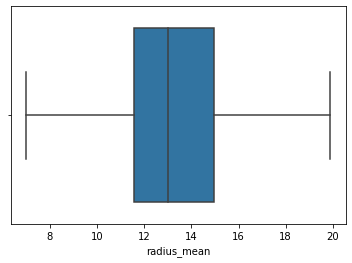

In [29]:
outlier = df[df['radius_mean'] > 21]
df = df[df['radius_mean'] < 21]
sns.boxplot(x = df['radius_mean'])

# Machine Learning Application

In [58]:
#splitting the dataset
X = df.drop('diagnosis', axis = 1)
Y = df.diagnosis
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)

In [59]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
#Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf_scores = []
cm = confusion_matrix(Y_test, Y_pred)
acc_logreg = accuracy_score(Y_test, Y_pred)
clf_scores.append(acc_logreg * 100)
print(cm)
print(acc_logreg)

[[202   5]
 [  4  97]]
0.9707792207792207


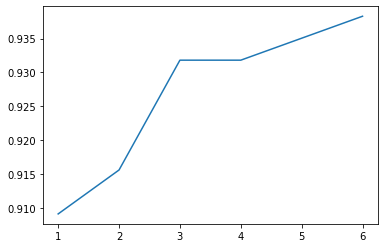

In [109]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,7):
    clf = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))
plt.plot(list(range(1,7)), list1)
plt.show()

In [110]:
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
acc_logreg = accuracy_score(Y_test, Y_pred)
clf_scores.append(acc_logreg * 100)
print(cm)
print(acc_logreg)

[[199   8]
 [ 11  90]]
0.9383116883116883


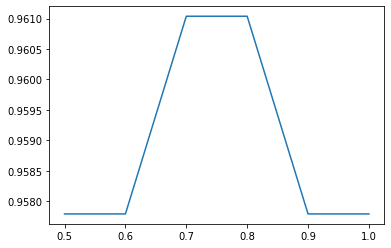

In [111]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    clf = SVC(C = c, random_state=0, kernel = 'rbf')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [112]:
from sklearn.svm import SVC
clf = SVC(C = 0.8, random_state=0, kernel = 'rbf')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
acc_logreg = accuracy_score(Y_test, Y_pred)
clf_scores.append(acc_logreg * 100)
print(cm)
print(acc_logreg)

[[200   7]
 [  5  96]]
0.961038961038961


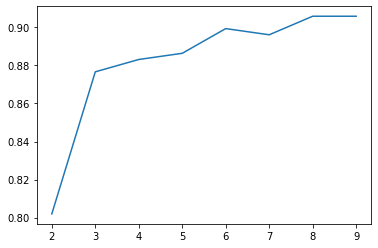

In [113]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    clf = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    list1.append(accuracy_score(Y_test,Y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [114]:
clf = DecisionTreeClassifier(max_leaf_nodes = 8, random_state=0, criterion='entropy')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
acc_logreg = accuracy_score(Y_test, Y_pred)
clf_scores.append(acc_logreg * 100)
print(cm)
print(acc_logreg)

[[196  11]
 [ 18  83]]
0.9058441558441559


In [115]:
clf_scores

[97.07792207792207, 93.83116883116884, 96.1038961038961, 90.5844155844156]

<BarContainer object of 4 artists>

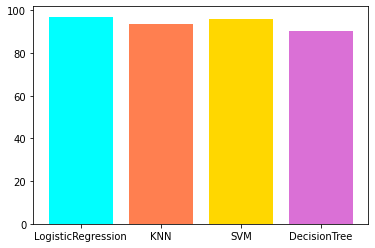

In [119]:
import matplotlib.pyplot as plt
x = clf_scores
y = ["LogisticRegression", "KNN", "SVM", "DecisionTree"]
plt.bar( y,x,color=['aqua', 'coral', 'gold', 'orchid'])